# 다양한 알고리즘 머신러닝 분류기를 사용해 뉴스 다중분류 해보자

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

import tensorflow as tf
from tensorflow.keras.datasets import reuters

print(tf.__version__)
print(mpl.__version__)
print(sns.__version__)
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)

2.6.0
3.4.3
0.11.2
1.21.4
1.3.3
1.0


## 데이터 준비; 단어-인덱스 사전 생성;

##### word_to_index, index_to_word

In [2]:
word_to_index = reuters.get_word_index(path="reuters_word_index.json")

In [3]:
len(word_to_index)

30979

In [4]:
index_to_word = { index+3 : word for word, index in word_to_index.items() }

+3 -> `<pad>`, `<sos>`, `<unk>`

In [5]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

##### index_to_word 함수

In [6]:
# index -> word 함수
def get_word(data):
    decoded_text = []
    for i in range(len(data)):
        t = ' '.join([index_to_word[index] for index in data[i]])
        decoded_text.append(t)
    return decoded_text

##### 모든 단어 사용

In [7]:
(x_train_none, y_train_none), (x_test_none, y_test_none) = reuters.load_data(num_words=None, test_split=0.2)

위에서 word_to_index의 크기를 확인해 num_words=None 일때의 단어 수가 30979개인 것을 알 수 있다.

In [8]:
x_train_none = get_word(x_train_none)
x_train_none[0]

'<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
x_test_none = get_word(x_test_none)
x_test_none[0]

'<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3'

##### 빈도수 상위 2,500개

In [10]:
(x_train_2500, y_train_2500), (x_test_2500, y_test_2500) = reuters.load_data(num_words=2500, test_split=0.2)

In [11]:
x_train_2500 = get_word(x_train_2500)
x_test_2500 = get_word(x_test_2500)

##### 빈도수 상위 5,000개

In [12]:
(x_train_5000, y_train_5000), (x_test_5000, y_test_5000) = reuters.load_data(num_words=5000, test_split=0.2)

In [13]:
x_train_5000 = get_word(x_train_5000)
x_test_5000 = get_word(x_test_5000)

##### 빈도수 상위 7,500개

In [14]:
(x_train_7500, y_train_7500), (x_test_7500, y_test_7500) = reuters.load_data(num_words=7500, test_split=0.2)

In [15]:
x_train_7500 = get_word(x_train_7500)
x_test_7500 = get_word(x_test_7500)

##### 빈도수 상위 10,000개

In [16]:
(x_train_10000, y_train_10000), (x_test_10000, y_test_10000) = reuters.load_data(num_words=10000, test_split=0.2)

In [17]:
x_train_10000 = get_word(x_train_10000)
x_test_10000 = get_word(x_test_10000)

##### 빈도수 상위 12,500개

In [18]:
(x_train_12500, y_train_12500), (x_test_12500, y_test_12500) = reuters.load_data(num_words=12500, test_split=0.2)

In [19]:
x_train_12500 = get_word(x_train_12500)
x_test_12500 = get_word(x_test_12500)

##### 빈도수 상위 15,000개

In [20]:
(x_train_15000, y_train_15000), (x_test_15000, y_test_15000) = reuters.load_data(num_words=15000, test_split=0.2)

In [21]:
x_train_15000 = get_word(x_train_15000)
x_test_15000 = get_word(x_test_15000)

##### 빈도수 상쉬 17,500개

In [22]:
(x_train_17500, y_train_17500), (x_test_17500, y_test_17500) = reuters.load_data(num_words=17500, test_split=0.2)

In [23]:
x_train_17500 = get_word(x_train_17500)
x_test_17500 = get_word(x_test_17500)

##### 빈도수 상위 20,000개

In [24]:
(x_train_20000, y_train_20000), (x_test_20000, y_test_20000) = reuters.load_data(num_words=20000, test_split=0.2)

In [25]:
x_train_20000 = get_word(x_train_20000)
x_test_20000 = get_word(x_test_20000)

## EDA

### 문장 길이 분포 확인

In [26]:
def analyze_text_length(x_train):
    length = [len(l.split(" ")) for l in x_train]
    print('훈련용 뉴스의 최대 길이 :{}'.format(max(length)))
    print('훈련용 뉴스의 평균 길이 :{}'.format(sum(length)/len(length)))
    
    plt.hist(length, bins=50)
    plt.xlabel('length of samples')
    plt.ylabel('number of samples')
    plt.show()

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


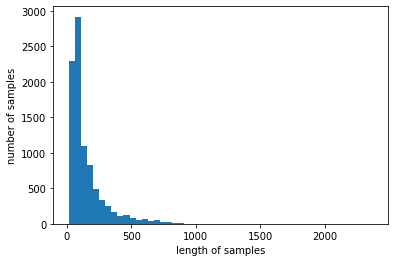

In [27]:
analyze_text_length(x_train_none)

### 클래스 빈도수 확인

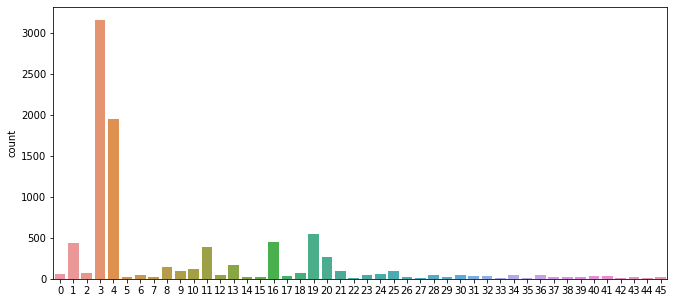

In [28]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train_none)
plt.show()

In [29]:
unique_elements, counts_elements = np.unique(y_train_none, return_counts=True)
print("각 클래스 빈도수:")
# print(np.asarray((unique_elements, counts_elements)))
class_frequencies = dict(zip(unique_elements, counts_elements))
print(dict(sorted(class_frequencies.items(), key=lambda x: x[1], reverse=True)))

각 클래스 빈도수:
{3: 3159, 4: 1949, 19: 549, 16: 444, 1: 432, 11: 390, 20: 269, 13: 172, 8: 139, 10: 124, 9: 101, 21: 100, 25: 92, 2: 74, 18: 66, 24: 62, 0: 55, 34: 50, 12: 49, 36: 49, 6: 48, 28: 48, 30: 45, 23: 41, 17: 39, 31: 39, 40: 36, 32: 32, 41: 30, 14: 26, 26: 24, 39: 24, 43: 21, 15: 20, 29: 19, 37: 19, 38: 19, 45: 18, 5: 17, 7: 16, 22: 15, 27: 15, 42: 13, 44: 12, 33: 11, 35: 10}


3, 4 클래스가 특히 많은 것을 확인할 수 있다. => 클래스 불균형 데이터

## 벡터화

##### 에러 기록

[공식문서: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)  
사용방법

```python
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
print(X.shape)
```

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidfv_none = tfidf_transformer.fit_transform(x_train_none)

ValueError: Expected 2D array, got 1D array instead:
array=['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'
 "<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3"
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for one split effective january 6 1987 per share amounts are calculated after preferred stock dividends loss continuing operations for the qtr 1986 includes gains of sale of investments in enron corp of 14 mln dlrs and associated companies of 4 189 000 less writedowns of investments in national intergroup inc of 11 8 mln and brae corp of 15 6 mln reuter 3'
 ...
 "<sos> international phoenix energy corp said it launched a gold recovery venture with lt phoenix exploration and recovery inc and mexico's sistemas tecnicos de recuperaciones sociedad anonima de capital variable the company said the joint venture will explore and recover gold precious metals and artefacts from treasure ships worth 10 billion dlrs reported to have sunk in the harbor area of vera cruz mexico the company said it expects work to begin in 30 days reuter 3"
 "<sos> shr loss 76 cts vs profit 50 cts net loss 19 186 000 vs profit 12 438 000 sales 157 9 mln vs 149 2 mln note fiscal 1987 net loss includes a pretax charge of 19 5 mln dlrs from restructuring and an after tax charge of about seven mln dlrs from debt prepayment premiums fiscal 1986 net profit includes a pretax gain of 7 2 mln dlrs on the sale of some land an after tax loss 1 35 mln dlrs from discontinued operations and an after tax gain of 6 7 mln dlrs from a change in accounting all results restated to exclude five businesses divested as part of the company's restructuring program reuter 3"
 "<sos> currency fluctuations may reassert their influence on the bullion market in the near future bullion bankers samuel montagu and co ltd said in a market report but the firm said silver may lag behind gold in any reactions to movements on foreign exchanges opec's failure to address the recent decline in oil prices remains a worrying factor however and on balance it appears that the market should be approached cautiously montagu said the bank said the us economy has shown no noticeable long term improvement and that both latin american debt and the iranian arms affair could undermine confidence in the dollar reuter 3"].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

=> 2d-array가 필요하다는 에러  
원인을 찾지 못함 

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [32]:
def myVectorizer(x_train, x_test):
    dtmvector = CountVectorizer()
    x_train_dtm = dtmvector.fit_transform(x_train)
    
    tfidf_transformer = TfidfTransformer()
    tfidfv_train = tfidf_transformer.fit_transform(x_train_dtm)
    
    x_test_dim = dtmvector.transform(x_test)
    tfidfv_test = tfidf_transformer.transform(x_test_dim)
    
    return tfidfv_train, tfidfv_test

In [33]:
tfidfv_train_none, tfidfv_test_none = myVectorizer(x_train_none, x_test_none)

In [34]:
tfidfv_train_2500, tfidfv_test_2500 = myVectorizer(x_train_2500, x_test_2500)
tfidfv_train_5000, tfidfv_test_5000 = myVectorizer(x_train_5000, x_test_5000)
tfidfv_train_7500, tfidfv_test_7500 = myVectorizer(x_train_7500, x_test_7500)
tfidfv_train_10000, tfidfv_test_10000 = myVectorizer(x_train_10000, x_test_10000)
tfidfv_train_12500, tfidfv_test_12500 = myVectorizer(x_train_12500, x_test_12500)
tfidfv_train_15000, tfidfv_test_15000 = myVectorizer(x_train_15000, x_test_15000)
tfidfv_train_17500, tfidfv_test_17500 = myVectorizer(x_train_17500, x_test_17500)
tfidfv_train_20000, tfidfv_test_20000 = myVectorizer(x_train_20000, x_test_20000)

In [35]:
data_set_list = [
    (tfidfv_train_5000, y_train_5000, tfidfv_test_5000,y_test_5000),
    (tfidfv_train_10000, y_train_10000, tfidfv_test_10000,y_test_10000),
    (tfidfv_train_15000, y_train_15000, tfidfv_test_15000,y_test_15000)
]

## 모델

In [36]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [37]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC

##### 모델 파라미터

In [38]:
nb = MultinomialNB()
cnb = ComplementNB()
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
svc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
dtree = DecisionTreeClassifier(max_depth=10, random_state=0)
rf = RandomForestClassifier(n_estimators=5, random_state=0)
gboost = GradientBoostingClassifier(random_state=0)
voting_classifier =  VotingClassifier(estimators=[("lr",LogisticRegression(C=10000, penalty='l2', max_iter=3000))
                                                  ,("cNB",ComplementNB())
                                                  ,("gboost",GradientBoostingClassifier(random_state=0))]
                                      ,voting='soft')

##### Support vector machine

In [41]:
import warnings
warnings.filterwarnings('ignore')

svc_accuracy_list = []
svc_f1_score_weighted_list = []

for tfidfv_train, y_train, tfidfv_test, y_test in data_set_list:
    print(tfidfv_train.shape)
    svc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
    svc.fit(tfidfv_train,y_train)
    
    predicted = svc.predict(tfidfv_test)
    print("정확도: ",accuracy_score(y_test,predicted))
    print("f1 score[weighted]", f1_score(y_test, predicted, average='weighted'))

    svc_accuracy_list.append({tfidfv_train.shape[1]:accuracy_score(y_test,predicted)})
    svc_f1_score_weighted_list.append({tfidfv_train.shape[1]:f1_score(y_test, predicted, average='weighted')})

(8982, 4867)
정확도:  0.7751558325912734
f1 score[macro]:  0.6386016316562068
f1 score[weighted] 0.772052814629195
(8982, 9670)
정확도:  0.7880676758682101
f1 score[macro]:  0.6387823273831286
f1 score[weighted] 0.7844219295773943
(8982, 14227)
정확도:  0.788512911843277
f1 score[macro]:  0.6356777978984908
f1 score[weighted] 0.7836544125797896


In [53]:
print("accuracy: ",[{k: round(v, 4)} for d in svc_accuracy_list for k, v in d.items()])
print("f1-score[weighted]: ",[{k: round(v, 4)} for d in svc_f1_score_weighted_list for k, v in d.items()])

accuracy:  [{4867: 0.7752}, {9670: 0.7881}, {14227: 0.7885}]
f1-score[weighted]:  [{4867: 0.7721}, {9670: 0.7844}, {14227: 0.7837}]


##### Gradient Boosting

In [42]:
gboost_accuracy_list = []
gboost_f1_score_weighted_list = []

for tfidfv_train, y_train, tfidfv_test, y_test in data_set_list:
    print(tfidfv_train.shape)
    gboost = GradientBoostingClassifier(random_state=0)
    gboost.fit(tfidfv_train, y_train)
    
    predicted = gboost.predict(tfidfv_test)
    print("정확도: ", accuracy_score(y_test, predicted))
    print("f1 score[weighted]", f1_score(y_test, predicted, average='weighted'))

    gboost_accuracy_list.append({tfidfv_train.shape[1]:accuracy_score(y_test, predicted)})
    gboost_f1_score_weighted_list.append({tfidfv_train.shape[1]:f1_score(y_test, predicted, average='weighted')})

(8982, 4867)
정확도:  0.767586821015138
f1 score[macro]:  0.5791898381470704
f1 score[weighted] 0.7662475269931749
(8982, 9670)
정확도:  0.7662511130899377
f1 score[macro]:  0.5776976501680481
f1 score[weighted] 0.7622247724249729
(8982, 14227)
정확도:  0.7707034728406055
f1 score[macro]:  0.5715717208990925
f1 score[weighted] 0.7679654864390242


In [52]:
print("accuracy: ",[{k: round(v, 4)} for d in gboost_accuracy_list for k, v in d.items()])
print("f1-score[weighted]: ",[{k: round(v, 4)} for d in gboost_f1_score_weighted_list for k, v in d.items()])

accuracy:  [{4867: 0.7676}, {9670: 0.7663}, {14227: 0.7707}]
f1-score[weighted]:  [{4867: 0.7662}, {9670: 0.7622}, {14227: 0.768}]


##### Decision Tree

In [54]:
dtree_accuracy_list = []
dtree_f1_score_weighted_list = []

for tfidfv_train, y_train, tfidfv_test, y_test in data_set_list:
    print(tfidfv_train.shape)
    dtree = DecisionTreeClassifier(max_depth=10, random_state=0)
    dtree.fit(tfidfv_train, y_train)

    predicted = dtree.predict(tfidfv_test)
    print("정확도: ", accuracy_score(y_test, predicted))
    print("f1 score[weighted]", f1_score(y_test, predicted, average='weighted'))

    dtree_accuracy_list.append({tfidfv_train.shape[1]:accuracy_score(y_test, predicted)})
    dtree_f1_score_weighted_list.append({tfidfv_train.shape[1]:f1_score(y_test, predicted, average='weighted')})


(8982, 4867)
정확도:  0.6179875333926982
f1 score[weighted] 0.5729970881280324
(8982, 9670)
정확도:  0.6202137132680321
f1 score[weighted] 0.5776398779280149
(8982, 14227)
정확도:  0.6193232413178985
f1 score[weighted] 0.5755585664009136


In [55]:
print("accuracy: ",[{k: round(v, 4)} for d in dtree_accuracy_list for k, v in d.items()])
print("f1-score[weighted]: ",[{k: round(v, 4)} for d in dtree_f1_score_weighted_list for k, v in d.items()])

accuracy:  [{4867: 0.618}, {9670: 0.6202}, {14227: 0.6193}]
f1-score[weighted]:  [{4867: 0.573}, {9670: 0.5776}, {14227: 0.5756}]


##### Complement Naive Bayes

In [57]:
cnb_accuracy_list = []
cnb_f1_score_weighted_list = []

for tfidfv_train, y_train, tfidfv_test, y_test in data_set_list:
    print(tfidfv_train.shape)
    cnb = ComplementNB()
    cnb.fit(tfidfv_train, y_train)

    predicted = cnb.predict(tfidfv_test)
    print("정확도: ", accuracy_score(y_test, predicted))
    print("f1 score[weighted]", f1_score(y_test, predicted, average='weighted'))

    cnb_accuracy_list.append({tfidfv_train.shape[1]:accuracy_score(y_test, predicted)})
    cnb_f1_score_weighted_list.append({tfidfv_train.shape[1]:f1_score(y_test, predicted, average='weighted')})

(8982, 4867)
정확도:  0.7707034728406055
f1 score[weighted] 0.7458990404916549
(8982, 9670)
정확도:  0.7707034728406055
f1 score[weighted] 0.7456682614453047
(8982, 14227)
정확도:  0.7720391807658059
f1 score[weighted] 0.7448186439256785


In [58]:
print("accuracy: ",[{k: round(v, 4)} for d in cnb_accuracy_list for k, v in d.items()])
print("f1-score[weighted]: ",[{k: round(v, 4)} for d in cnb_f1_score_weighted_list for k, v in d.items()])

accuracy:  [{4867: 0.7707}, {9670: 0.7707}, {14227: 0.772}]
f1-score[weighted]:  [{4867: 0.7459}, {9670: 0.7457}, {14227: 0.7448}]


## 딥러닝 모델

In [9]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# 하이퍼파라미터 설정
vocab_size = 10000     # 사용할 단어 수
maxlen = 200           # 시퀀스 길이 고정

# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=vocab_size, test_split=0.2)

# 시퀀스 패딩
x_train = pad_sequences(x_train, maxlen=maxlen, padding='pre')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='pre')

# 레이블 one-hot 인코딩 (다중 클래스 분류)
num_classes = max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

embedding_dim = 128
rnn_units = 64

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(SimpleRNN(rnn_units))
model.add(Dense(num_classes, activation='softmax'))  # 다중 클래스 분류

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 128)          1280000   
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 64)                12352     
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 1,295,342
Trainable params: 1,295,342
Non-trainable params: 0
_________________________________________________________________


In [11]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[early_stop])


Epoch 1/20
57/57 [==============================] - 10s 162ms/step - loss: 2.7348 - accuracy: 0.3371 - val_loss: 2.3892 - val_accuracy: 0.3450
Epoch 2/20
57/57 [==============================] - 9s 160ms/step - loss: 2.3365 - accuracy: 0.3932 - val_loss: 2.3058 - val_accuracy: 0.4162
Epoch 3/20
57/57 [==============================] - 9s 159ms/step - loss: 2.0516 - accuracy: 0.4683 - val_loss: 2.1571 - val_accuracy: 0.4112
Epoch 4/20
57/57 [==============================] - 9s 160ms/step - loss: 1.6110 - accuracy: 0.5919 - val_loss: 1.9443 - val_accuracy: 0.4530
Epoch 5/20
57/57 [==============================] - 9s 161ms/step - loss: 1.2489 - accuracy: 0.7100 - val_loss: 1.9897 - val_accuracy: 0.4452
Epoch 6/20
57/57 [==============================] - 9s 160ms/step - loss: 0.9405 - accuracy: 0.7901 - val_loss: 2.0617 - val_accuracy: 0.4491
Epoch 7/20
57/57 [==============================] - 9s 159ms/step - loss: 0.6938 - accuracy: 0.8594 - val_loss: 2.1369 - val_accuracy: 0.4485


In [12]:
loss, acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {acc:.4f}')


71/71 [==============================] - 1s 18ms/step - loss: 1.9391 - accuracy: 0.4653
Test Accuracy: 0.4653


딥러닝 모델 추가, 수정이 필요함

## 결론

8가지 머신러닝 기법에 대해 5000, 10000, 15000으로 실험 결과

In [14]:
# accuracy
svm_accuracy = [0.775,0.788,0.789]
gboost_accuracy = [0.768, 0.766, 0.771]
dtree_accuracy = [0.618, 0.620, 0.619]
cnb_accuracy = [0.771, 0.771, 0.77]
nb_accuracy = [0.6732, 0.6589, 0.6371]
voting_nb_lr_rf_acc = [0.7560,0.7369,0.7222]
lr_accuracy = [0.80,0.81,0.81]
rf_accuracy = [0.70,0.67,0.67]

In [25]:
# f1-score[weighted]
svm_f1 = [0.772,0.784,0.784]
gboost_f1 = [0.766, 0.762, 0.768]
dtree_f1 = [0.573,0.578,0.576]
cnb_f1 = [0.746,0.746,0.745]
nb_f1 = [0.6013,0.5782,0.5536]
voting_nb_lr_rf_f1 = [0.7222,0.6962,0.6781]
lr_f1 = [0.80,0.81,0.81]
rf_f1 = [0.68,0.64,0.64]

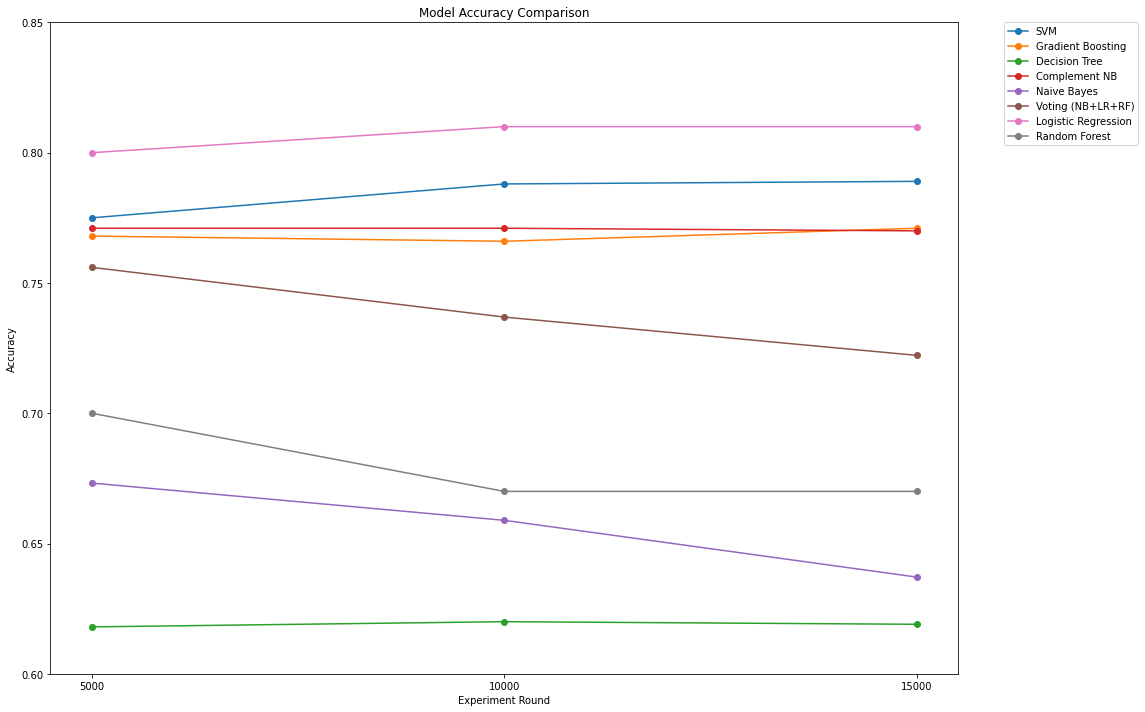

In [26]:
import matplotlib.pyplot as plt
# vocab_size
rounds = [5000, 10000, 15000]
# 🔍 그래프 크기 키우기
plt.figure(figsize=(16, 10))

# 모델별 선 그래프
plt.plot(rounds, svm_accuracy, marker='o', label='SVM')
plt.plot(rounds, gboost_accuracy, marker='o', label='Gradient Boosting')
plt.plot(rounds, dtree_accuracy, marker='o', label='Decision Tree')
plt.plot(rounds, cnb_accuracy,marker='o',  label='Complement NB')
plt.plot(rounds, nb_accuracy, marker='o', label='Naive Bayes')
plt.plot(rounds, voting_nb_lr_rf_acc,marker='o',  label='Voting (NB+LR+RF)')
plt.plot(rounds, lr_accuracy, marker='o', label='Logistic Regression')
plt.plot(rounds, rf_accuracy,marker='o',  label='Random Forest')

# x축 설정 (3개만 출력)
plt.xticks(ticks=rounds)

# 그래프 설정
plt.xlabel('Experiment Round')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.6, 0.85)  # y축 범위 조절
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()

# 그래프 표시
plt.show()

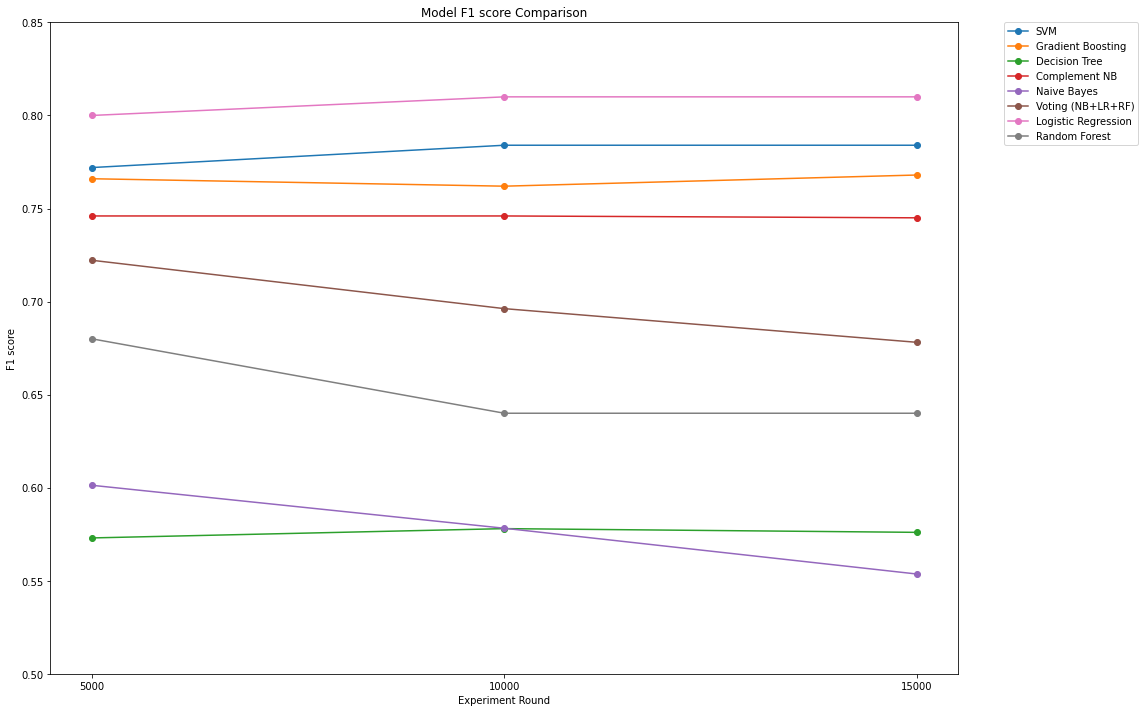

In [28]:
# vocab_size
rounds = [5000, 10000, 15000]
# 🔍 그래프 크기 키우기
plt.figure(figsize=(16, 10))

# 모델별 선 그래프
plt.plot(rounds, svm_f1, marker='o', label='SVM')
plt.plot(rounds, gboost_f1, marker='o', label='Gradient Boosting')
plt.plot(rounds, dtree_f1, marker='o', label='Decision Tree')
plt.plot(rounds, cnb_f1,marker='o',  label='Complement NB')
plt.plot(rounds, nb_f1, marker='o', label='Naive Bayes')
plt.plot(rounds, voting_nb_lr_rf_f1,marker='o',  label='Voting (NB+LR+RF)')
plt.plot(rounds, lr_f1, marker='o', label='Logistic Regression')
plt.plot(rounds, rf_f1,marker='o',  label='Random Forest')

# x축 설정 (3개만 출력)
plt.xticks(ticks=rounds)

# 그래프 설정
plt.xlabel('Experiment Round')
plt.ylabel('F1 score')
plt.title('Model F1 score Comparison')
plt.ylim(0.5, 0.85)  # y축 범위 조절
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()

# 그래프 표시
plt.show()

#### 팀 인사이트

| **모델** | **5000 Acc / F1** | **10000 Acc / F1** | **15000 Acc / F1** |
| --- | --- | --- | --- |
| **전통 ML 단일 모델** |  |  |  |
| Decision Tree (dtree) | 0.618 / 0.573 | 0.6202 / 0.5776 | 0.6193 / 0.5756 |
| Naive Bayes | 0.6732 / 0.6013 | 0.6589 / 0.5782 | 0.6371 / 0.5536 |
| Complement Naive Bayes | 0.7707 / 0.7459 | 0.7707 / 0.7457 | 0.772 / 0.7448 |
| SVM | 0.7752 / 0.7721 | 0.7881 / 0.7844 | 0.7885 / 0.7837 |
| Random Forest | 0.70 / 0.68 | 0.67 / 0.64 | 0.67 / 0.64 |
| Gradient Boosting | 0.7676 / 0.7662 | 0.7663 / 0.7622 | 0.7707 / 0.7680 |
| Logistic Regression (L2) | 0.80 / 0.80 | 0.81 / 0.81 | 0.81 / 0.81 |
| **ML Ensemble voting** |  |  |  |
| NB + LR + RF (soft) | 0.7560 / 0.7222 | 0.7369 / 0.6962 | 0.7222 / 0.6781 |
| NB + SVM + RF (hard) | 0.7752 / 0.7510 | 0.7582 / 0.7310 | 0.7507 / 0.7229 |
| CNB + SVM + RF (hard) | 0.7979 / 0.7794 | 0.8010 / 0.7828 | 0.7983 / 0.7809 |
| LR + SVM + GBT (hard) | **0.8215 / 0.8100** | 0.8179 / 0.8075 | 0.8197 / 0.8088 |
| **딥러닝 모델** (5000만 측정) |  |  |  |
| LSTM | 0.6109 / 0.5635 | 0.64/0.62 | - |
| Bi-LSTM | 0.5850 / 0.5317 | - | - |
| CNN | 0.7912 / 0.7736 | - | - |

| 단어 수 (vocab size) | 평균 Accuracy | 평균 F1-score | 요약 평가 |
| --- | --- | --- | --- |
| 5,000 | 0.7357 | 0.7102 | ⚪ 안정적이나 약간 부족 |
| **10,000** | **0.7399** | **0.7135** | 🟢 **가장 균형 좋고 성능 우수** |
| 15,000 | 0.7334 | 0.7041 | 🟡 일부 모델은 좋지만 평균은 하락 |

 
- 단일모델로 보았을 때 SVM과 LR이 가장 높은 성능을 보임
- 복합모델로는 SVM과 LR이 포함된 보팅모델이 가장 높은 성능을 보였다.
- 가장 높은 성능을 보인것은 단어 수 5000에 복합모델이지만 평균적으로 좋은 성능을 보이는 단어 수는 10,000으로 확인됨
- 전체적으로 DL모델에 비해 ML모델이 더 높은 성능을 보임 (데이터 수가 적어서 그런 것으로 추정)
- 트리 모델에서는 구분기준이 명확한 경우에 좋은 성능을 기대할 수 있고, 뉴스토픽같이 구분이 기준이 명확하지 않을 때는 선형기반모델이 좋은 성능을 기대할 수 있다.

## 회고

코드 정리가 더 필요하다.  
좀 더 많은 수의 vocab를 실험해서 경향성을 확인하고 싶다.  
딥러닝 simple rnn 설계가 잘못된 것 같다.(확인 필요함)  
딥러닝 모델에 대해서도 다양하게 실험이 필요하다.  
  
알고리즘 기반 모델에 대해서는 `선형성을 가지는 모델`과 `트리 기반 모델`, `확률 기반 모델`로 나눠서 생각해 볼 수 있다.  
언어 데이터에 대해서는 `선형성을 가지는 모델`이 좋은 성능을 보여주는데, tf-idf를 사용하면 고차원 공간에서 클래스들이 선형적으로 구분 가능한 경우가 많아서 성능이 좋은 것 같다.  
`트리 기반 모델`은 클래스를 나누는 기준이 명확할 때 성능이 좋은데, 언어 데이터에서는 이런 특성이 없어서, 성능이 좋지 않은 것 같다.   
`확률 기반 모델`은 다중분류 문제에서는 클래스간 경계가 명확하지 않은데, 클래스 간 경계가 복잡한 경우 단순한 확률 분포로 분리하기 어려운 것 같다.

공부가 더 필요하다  